In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.set_printoptions(precision=3)

from src.model import SQANN, double_selective_activation
from src.utils import make_layer_setting, simple_evaluation, standard_evaluation

# Data and some settings

In [2]:
a1 = 0.001
a2 = 0.5
t_admission = 0.1
t_threshold = 0.9

# training data
X = np.array([[1.,1.2],[1.2,0.8],[-1.,-1.],[-1.2,-1.2],])
Y = np.array([1.,1., 0.,0.])
N = len(X)

# test data
X_test = np.array([[1.25,1.25],[-1.25,-1.],[-1,-1.4]])
Y_test = np.array([1.,0.,0.])

# Some scratch Works

In [3]:
act1_0 = double_selective_activation(np.sum((X[1]-X[0])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
act2_0 = double_selective_activation(np.sum((X[2]-X[0])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
act3_0 = double_selective_activation(np.sum((X[3]-X[0])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
act3_2 = double_selective_activation(np.sum((X[3]-X[2])**2)**0.5 ,r=0.5, a1=a1, a2=a2)

print('act1_0:',act1_0)
print('act2_0:',act2_0)
print('act3_0:',act3_0)
print('act3_2:',act3_2)

# next layer

act1_2 = double_selective_activation(np.sum((X[1]-X[2])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
v1 = np.array([act1_0,act1_2])
v3 = np.array([act3_0,act3_2])
act3_1 = double_selective_activation(np.sum((v3-v1)**2)**0.5 ,r=0.5, a1=a1, a2=a2)
print('next layer:')
print('act1_2:',act1_2)
print('act3_1:',act3_1)

# test
test0_0 = double_selective_activation(np.sum((X_test[0]-X[0])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
test0_2 = double_selective_activation(np.sum((X_test[0]-X[2])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
print('\ntest:')
print('test0_0:',test0_0)
print('test0_2:',test0_2)

vtest_0 = np.array([test0_0,test0_2])
test_0_1 = double_selective_activation(np.sum((vtest_0-v1)**2)**0.5 ,r=0.5, a1=a1, a2=a2)
test_0_3 = double_selective_activation(np.sum((vtest_0-v3)**2)**0.5 ,r=0.5, a1=a1, a2=a2)
print('test_0_1:',test_0_1)
print('test_0_3:',test_0_3)

test_1_0 = double_selective_activation(np.sum((X_test[1]-X[0])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
test_1_2 = double_selective_activation(np.sum((X_test[1]-X[2])**2)**0.5 ,r=0.5, a1=a1, a2=a2)
print('test_1_0:',test_1_0)
print('test_1_2:',test_1_2)

vtest_1 = np.array([test_1_0,test_1_2])
test_1_3 = double_selective_activation(np.sum((vtest_1-v3)**2)**0.5 ,r=0.5, a1=a1, a2=a2)
print('test_1_3:',test_1_3)

act1_0: 0.3344454438567918
act2_0: 5.655468838366701e-05
act3_0: 4.7165361758324685e-05
act3_2: 0.5009573514714075
next layer:
act1_2: 6.187353050365053e-05
act3_1: 0.007324948714461226

test:
test0_0: 0.5052960903090358
test0_2: 4.9377839225755484e-05
test_0_1: 0.5164688877956867
test_0_3: 0.0009858581567478246
test_1_0: 5.048720149442117e-05
test_1_2: 0.5059247004830902
test_1_3: 0.9879598030304475


# Automated Model Building

In [4]:
MAX_LAYER = 3
layer_settings = {
    # make_layer_setting(a1, a2,  admission_threshold, activation_threshold, max_n)
    i: make_layer_setting(a1, a2,t_admission, t_threshold, ) for i in range(1,1+MAX_LAYER) # BEST NOW
}

net = SQANN(layer_settings, N)
net.fit_data(X,Y,verbose=20)


Exiting layer_k_sample_collection() because all data have been used.
Final positions of indices in the layers:
  [1] [0, 2]
  [2] [1, 3]


In [5]:
simple_evaluation(X,Y,net, header_text='Show fitting on training data', verbose=20)

simple_evaluation()
Show fitting on training data
N_MISSED_ACTIVATIONS:0, N_large_error (>0.1):0
avg error          :     0.0, avg_frac_error          :     0.5 
avg exclusive error:     0.0, avg exclusive frac error:     0.5


# Testing Model

In [6]:
_, INTERP_INDICES_test = standard_evaluation(X_test, Y_test, net, get_interp_indices=True)

 i     Layer     |y-y0|                           abs error
[0]    L=[1, 2]    |(1.0  ) - (1.0  ))|                 0.0      INTERPOLATE
[1]    L=2         |(0.0  ) - (0.0  ))|                 0.0      HIT
[2]    L=[1, 2]    |(0.0  ) - (0.0  ))|                 0.0      INTERPOLATE
N_INTERPOLATED:2, N_large_error (>0.1):0
avg error          :     0.0, avg_frac_error          : 0.66667 
avg exclusive error:     0.0, avg exclusive frac error: 0.66667


In [7]:
X_INTERP, Y_INTERP = [], []
INTERP_MEMBER_LIST = []
for i in INTERP_INDICES_test:
    X_INTERP.append(X_test[i,:])
    y_interp,_,_, interp_info = net.SQANN_propagation(X_test[i,:],ALLOW_INTERPOLATION=True)
    Y_INTERP.append(y_interp)
    
    interpolation_ends = []
    for _, info in interp_info.items():
        _, layer_k, this_index = info
        interpolation_ends.append(net.used_indices[layer_k][this_index])
    INTERP_MEMBER_LIST.append(interpolation_ends)
    
X_INTERP, Y_INTERP = np.array(X_INTERP), np.array(Y_INTERP )

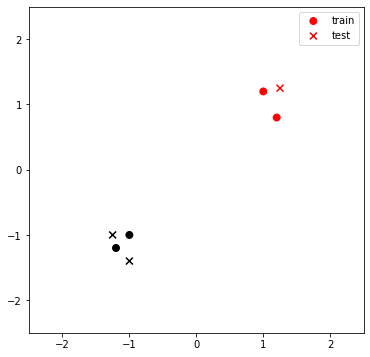

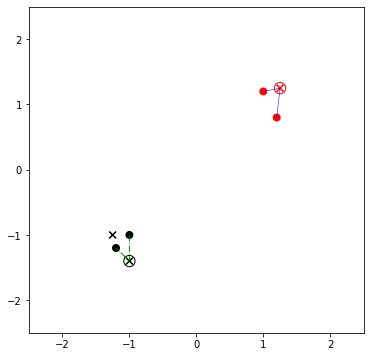

In [8]:
def plot(X,Y, X_test, Y_test, X_INTERP, Y_INTERP, INTERP_MEMBER_LIST, with_annot=True):
    VMAX = 1.5
    plt.figure(figsize=(6,6))
    
    c = np.array([Y,Y*0,Y*0]).T
    plt.gca().scatter(X[:,0],X[:,1],s=48, c=c, vmin=0.,vmax=VMAX,label='train')

    c1 = np.array([Y_test,Y_test*0,Y_test*0]).T
    plt.gca().scatter(X_test[:,0],X_test[:,1],s=48, c=c1, marker='x', vmin=0.,vmax=VMAX,label='test')
    
    if with_annot:
        c2 = np.array([Y_INTERP,Y_INTERP*0,Y_INTERP*0]).T
        plt.gca().scatter(X_INTERP[:,0],X_INTERP[:,1],s=128, facecolors='none' , edgecolors=c2 ,
            linewidth=1, vmin=0.,vmax=VMAX,cmap='Oranges')

        alt_line_style = ['-','-.']
        alt_line_width = [0.5,1., 1.5]
        alt_colors = ['b','g','y','cyan']
        for i, (j,k) in enumerate(INTERP_MEMBER_LIST):
            plt.plot([X[j,0], X_INTERP[i,0] ,X[k,0]],[X[j,1], X_INTERP[i,1] ,X[k,1]], 
                linewidth= alt_line_width[i%len(alt_line_width)] , 
                c=alt_colors[i%len(alt_colors)], 
                linestyle=alt_line_style[i%len(alt_line_style)])
    plt.gca().set_xlim([-2.5,2.5])
    plt.gca().set_ylim([-2.5,2.5])

plot(X,Y, X_test, Y_test, X_INTERP, Y_INTERP, INTERP_MEMBER_LIST, with_annot=False)    
plt.legend()
plot(X,Y, X_test, Y_test, X_INTERP, Y_INTERP, INTERP_MEMBER_LIST) 